<a href="https://colab.research.google.com/github/phycem/Data-Science-Projects-and-Tasks/blob/main/Awake_Labs_Data_Science_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modularize the task code for readability by using cookiecutter. https://github.com/drivendata/cookiecutter-data-science

In [1]:
 pip install cookiecutter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.8 MB/s 


In [2]:
!cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

project_name [project_name]: Aborted!
^C


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

import plotly.graph_objects as go
import tensorflow as tf

import plotly.express as px

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'/content/gdrive/My Drive/Dataset for DS Challenge.csv')

Fix a column name sex to male. 

In [5]:
df.rename(columns = {"sex": "male"}, 
          inplace = True)

##None of the feature values on rows after row 303 present

In [6]:
df

,age,male,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    float64
 1   male          303 non-null    float64
 2   cp            303 non-null    float64
 3   trtbps        303 non-null    float64
 4   chol          303 non-null    float64
 5   fbs           303 non-null    float64
 6   restecg       303 non-null    float64
 7   thalachh      303 non-null    float64
 8   exng          303 non-null    float64
 9   oldpeak       303 non-null    float64
 10  slp           303 non-null    float64
 11  caa           303 non-null    float64
 12  thall         303 non-null    float64
 13  output        303 non-null    float64
 14  o2Saturation  3586 non-null   float64
dtypes: float64(15)
memory usage: 420.4 KB


Drop the empty rows on the table.

In [7]:
df_numerical = df.dropna(axis=0)

In [13]:
df_numerical

,age,male,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,o2Saturation
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.6
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,98.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0,97.5
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0,97.5
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0,97.5
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0,97.5


Check if there is still any missing value.

In [8]:
df_numerical.isnull().sum()

age             0
male            0
cp              0
trtbps          0
chol            0
fbs             0
restecg         0
thalachh        0
exng            0
oldpeak         0
slp             0
caa             0
thall           0
output          0
o2Saturation    0
dtype: int64

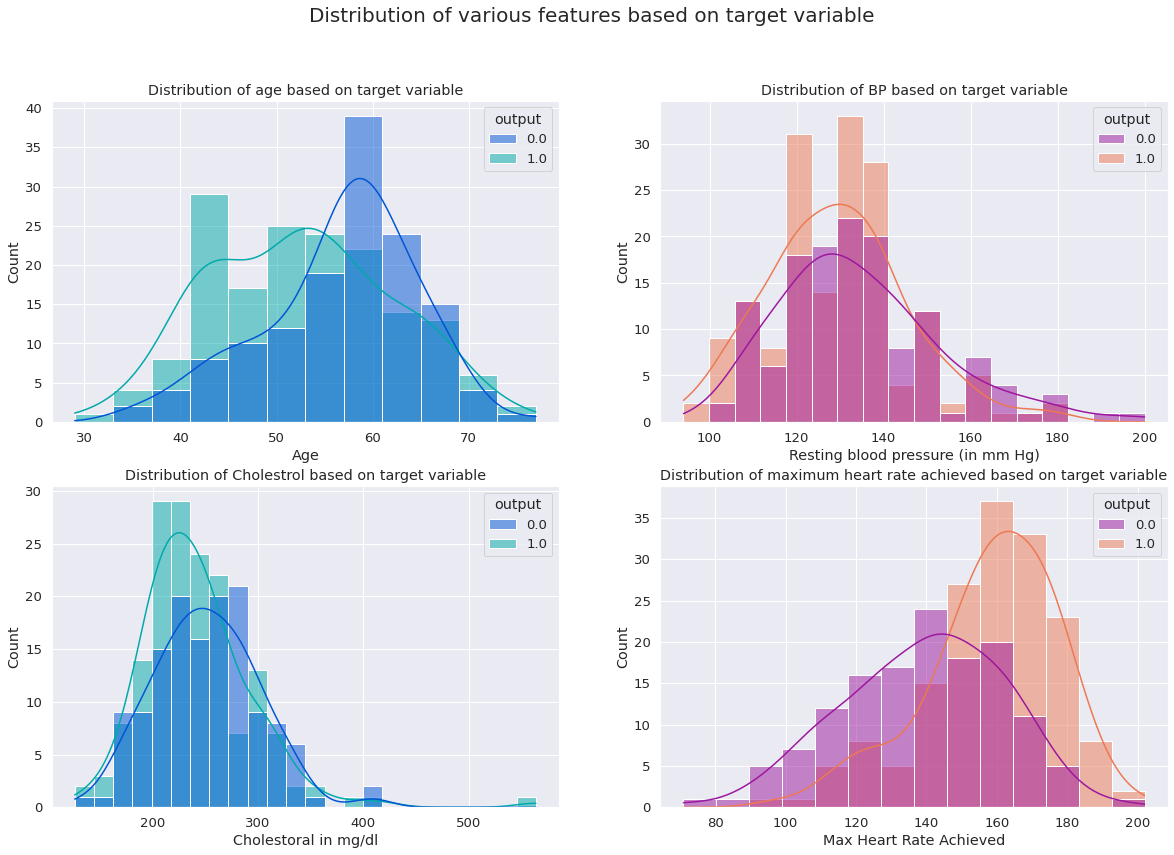

In [9]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= df_numerical, hue= 'output', kde= True, ax= ax[0, 0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trtbps', data= df_numerical, hue= 'output', kde= True, ax= ax[0, 1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= df_numerical, hue= 'output', kde= True, ax= ax[1, 0], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalachh', data= df_numerical, hue= 'output', kde= True, ax= ax[1, 1], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

We can clearly spot a pattern in the distribution of maximum heart rate achieved. Those who have reached a higher maximum heart rate are more likely to have a heart attack

## There are outliers for blood pressure, Cholestoral, maximum heart rate. 

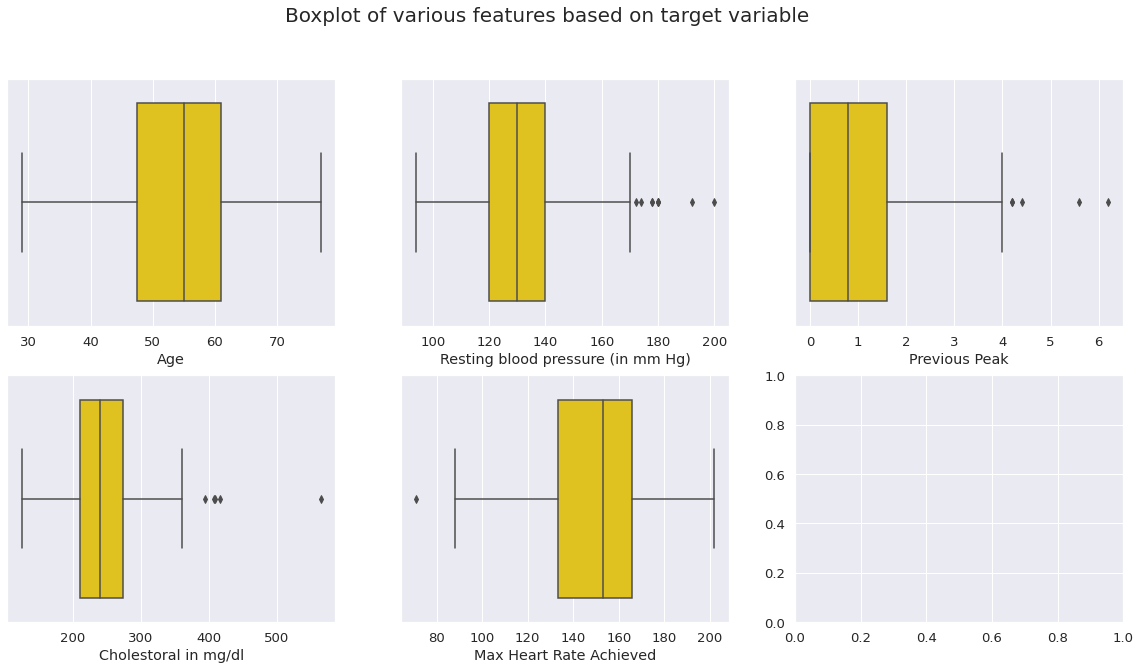

In [10]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 3, figsize = (20, 10))

plt.suptitle('Boxplot of various features based on target variable', fontsize = 20)

ax1 = sns.boxplot(x ='age', data= df_numerical, ax= ax[0, 0], color = '#FFD700')
ax1.set(xlabel = 'Age')

ax2 = sns.boxplot(x ='trtbps', data= df_numerical, ax= ax[0, 1], color='#FFD700')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)')

ax3 = sns.boxplot(x ='chol', data= df_numerical, hue= 'output', ax= ax[1, 0], color= '#FFD700')
ax3.set(xlabel = 'Cholestoral in mg/dl')

ax4 = sns.boxplot(x ='thalachh', data= df_numerical, ax= ax[1, 1], color = '#FFD700')
ax4.set(xlabel = 'Max Heart Rate Achieved')

ax5 = sns.boxplot(x ='oldpeak', data= df_numerical, ax= ax[0, 2], color = '#FFD700')
ax5.set(xlabel = 'Previous Peak')

plt.show()

##Setting up a histogram plot:


In [11]:
def plot_histgram(feature):    
    fig = px.histogram(df_numerical, x=feature,
                       color="output", 
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )  
    fig.update_layout(
        title_font_color="white",
        legend_title_font_color="yellow",
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        paper_bgcolor="grey",
        plot_bgcolor='black',
        font_color="white"
    )
    fig.show()

In [12]:
def display_stat(feature):
    mean = df_numerical[feature].mean()
    std = df_numerical[feature].std()
    skew = df_numerical[feature].skew()
    kurtosis = df_numerical[feature].kurtosis()
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

#Looking at the age more closely:

##The older people are more tend to get heart attack.

Checking closely the median of heart attack risk group is 57 and normal is 51. 

In [13]:
plot_histgram('age')
display_stat('age')

mean: 54.3663, std: 9.0821, skew: -0.2025, kurtosis: -0.5422 


#Check the outliers in detail and let's fix them by removing. 

##Resting Blood Pressure

In [14]:
plot_histgram('trtbps')
display_stat('trtbps')

mean: 131.6238, std: 17.5381, skew: 0.7138, kurtosis: 0.9291 


The observable outlier for the Resting Blood Pressure is the 0 Resting Blood Pressure which is impossible to have a heart attack chance. We can replace this value with the median value to balance the data set. 

In [26]:
df_numerical['trtbps'].replace(0, df_numerical['trtbps'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#PROBLEM???

In [27]:
plot_histgram('trtbps')
display_stat('trtbps')

mean: 131.6238, std: 17.5381, skew: 0.7138, kurtosis: 0.9291 


##Cholesterol 

In [32]:
plot_histgram('chol')
display_stat('chol')

mean: 246.2640, std: 51.8308, skew: 1.1434, kurtosis: 4.5054 


There is no visible outliers and the dataset is distributed fairly.

##Maximum Heart Rate Achieved

In [33]:
plot_histgram('thalachh')
display_stat('thalachh')

mean: 149.6469, std: 22.9052, skew: -0.5374, kurtosis: -0.0620 


No visible outliers. The dataset is distributed fairly. 

#Previous Peak

During heart attack or close to heart attack, the heart rate signals get fewer. It is reasonable to have higher chances of heart attack when the heart rate peaks get lesser. 

--2022-11-12 20:33:47--  https://i.pinimg.com/564x/f4/8b/a9/f48ba9bfef834df441c90814d1bff001.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.6.118.40, 23.6.118.41, 2600:1408:5400:18::170c:935c, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.6.118.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27197 (27K) [image/jpeg]
Saving to: ‘f48ba9bfef834df441c90814d1bff001.jpg.1’

f48ba9bfef834df441c 100%[===================>]  26.56K  --.-KB/s    in 0.01s   

2022-11-12 20:33:48 (1.89 MB/s) - ‘f48ba9bfef834df441c90814d1bff001.jpg.1’ saved [27197/27197]



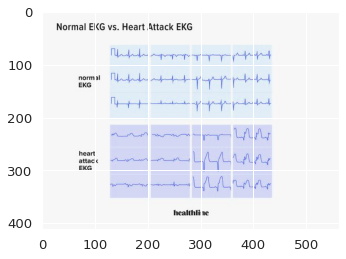

<Figure size 1200x480 with 0 Axes>

In [69]:
#@title Hear rate peaks
import cv2
!wget "https://i.pinimg.com/564x/f4/8b/a9/f48ba9bfef834df441c90814d1bff001.jpg"
from matplotlib import pyplot as plt
img_color = cv2.imread('f48ba9bfef834df441c90814d1bff001.jpg',1)
img_grayscale = cv2.imread('f48ba9bfef834df441c90814d1bff001.jpg',0)
img_unchanged = cv2.imread('f48ba9bfef834df441c90814d1bff001.jpg',-1)
plt.imshow(img_color)
plt.figure(figsize=(15, 6), dpi=80)
plt.show()

In [39]:
plot_histgram('oldpeak')
display_stat('oldpeak')

mean: 1.0396, std: 1.1611, skew: 1.2697, kurtosis: 1.5758 


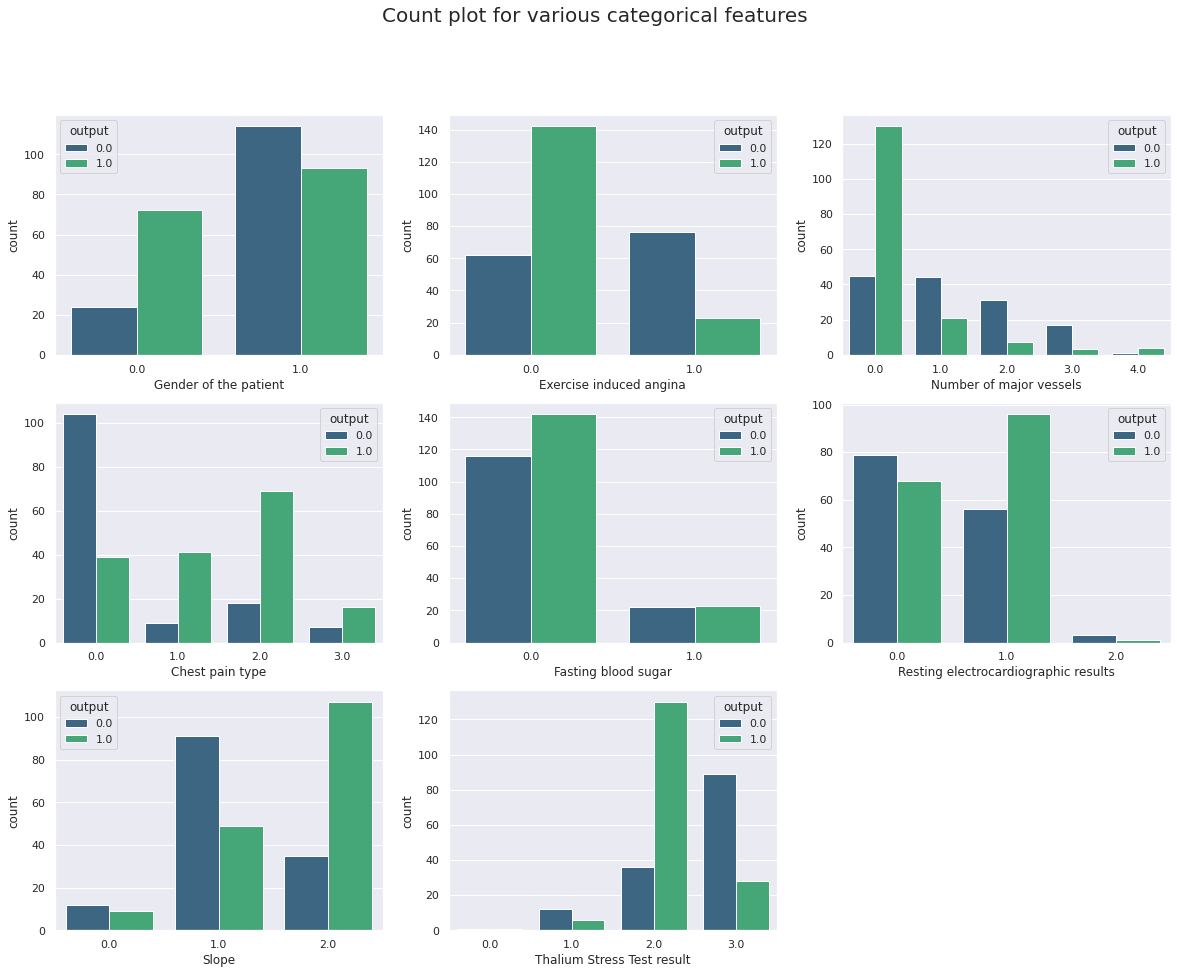

In [28]:
#@title Categorical Feature Analysis
sns.set_context('notebook', font_scale= 1)
fig, ax = plt.subplots(3, 3, figsize = (20, 15))
ax[2, 2].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 20)

ax1 = sns.countplot(x ='male', data= df_numerical, ax= ax[0, 0], hue = 'output' ,palette= 'viridis')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='exng', data= df_numerical, hue= 'output', ax= ax[0, 1], palette= 'viridis')
ax2.set(xlabel = 'Exercise induced angina')

ax3 = sns.countplot(x ='caa', data= df_numerical, ax= ax[0, 2], hue = 'output', palette= 'viridis')
ax3.set(xlabel = 'Number of major vessels')

ax4 = sns.countplot(x ='cp', data= df_numerical, hue = 'output', ax= ax[1, 0], palette= 'viridis')
ax4.set(xlabel = 'Chest pain type')

ax5 = sns.countplot(x ='fbs', data= df_numerical, hue = 'output', ax= ax[1, 1], palette= 'viridis')
ax5.set(xlabel = 'Fasting blood sugar')

ax6 = sns.countplot(x ='restecg', data= df_numerical, ax= ax[1, 2], hue = 'output', palette= 'viridis')
ax6.set(xlabel = 'Resting electrocardiographic results')

ax7 = sns.countplot(x ='slp', data= df_numerical, ax= ax[2, 0], hue = 'output', palette= 'viridis')
ax7.set(xlabel = 'Slope')

ax8 = sns.countplot(x ='thall', data= df_numerical, ax= ax[2, 1], hue = 'output', palette= 'viridis')
ax8.set(xlabel = 'Thalium Stress Test result')

plt.show()


Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left


Male sex experiences more heart attacks than female. It is wierd how heart attack can occur more when there is no exercise induced angina, fasting sugar low, resting electrocardiographic results being normal and having more cases of heart attack and non are wierd but okay. 

As slop of the heart rate increases the heart attack chances increase. 

In general, as stress increases the heart attack chances increase. 

In [29]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Heart Disease']
values = df_numerical['output'].value_counts()/df_numerical['output'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Heart Disease",
    title_font_color="black",
    legend_title_font_color="yellow",
    #paper_bgcolor="black",
    #plot_bgcolor='black',
    font_color="black",
)
fig.show()

Heart attack results are balanced. It can be fairly comparable among variables such as colestrol, resting blood pressure, age, ...  

#HEAT MAP 

To check if there is any correlation between variables and output (heart attack or no attack ). We cannot determine any correlation since there are more special groups under each category such as chest pain levels

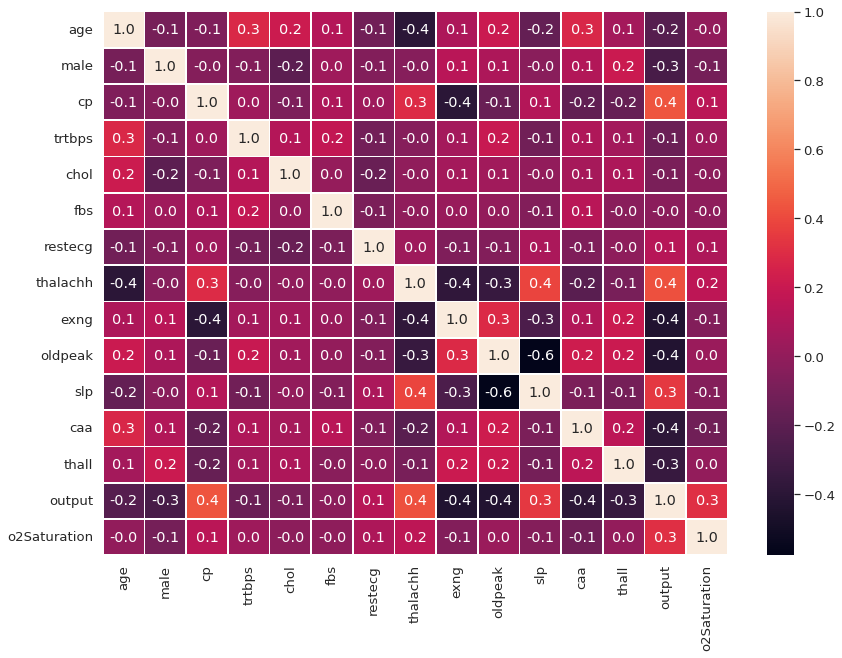

In [76]:
plt.figure(figsize = (14,10))
sns.heatmap(df_numerical.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()